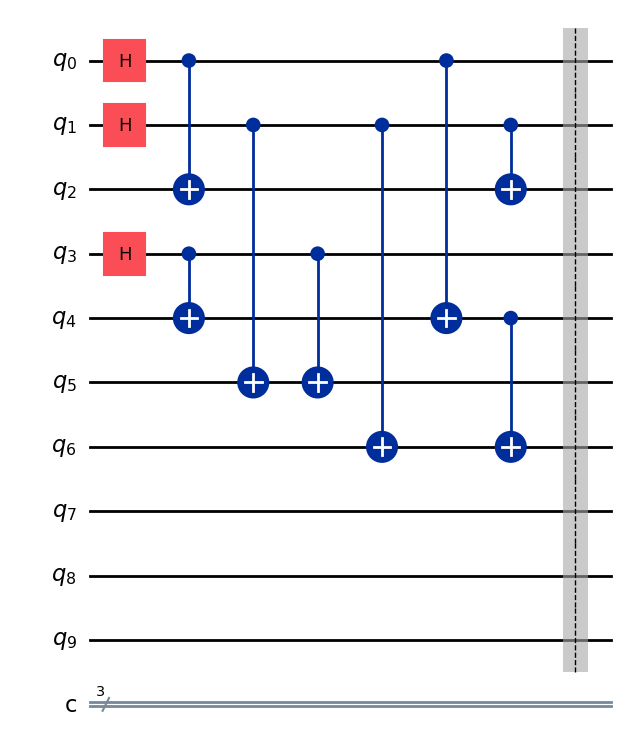

In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

qreg = QuantumRegister(10, "q")
creg = ClassicalRegister(3, "c")

# Encoding circuit to create the logical basis states
encodingcircuit = QuantumCircuit(qreg, creg)
encodingcircuit.h(qreg[0])
encodingcircuit.h(qreg[1])
encodingcircuit.h(qreg[3])
encodingcircuit.cx(qreg[0], qreg[2])
encodingcircuit.cx(qreg[1], qreg[5])
encodingcircuit.cx(qreg[3], qreg[4])
encodingcircuit.cx(qreg[3], qreg[5])
encodingcircuit.cx(qreg[1], qreg[6])
encodingcircuit.cx(qreg[0], qreg[4])
encodingcircuit.cx(qreg[1], qreg[2])
encodingcircuit.cx(qreg[4], qreg[6])
encodingcircuit.barrier()
encodingcircuit.draw('mpl', style='iqp')

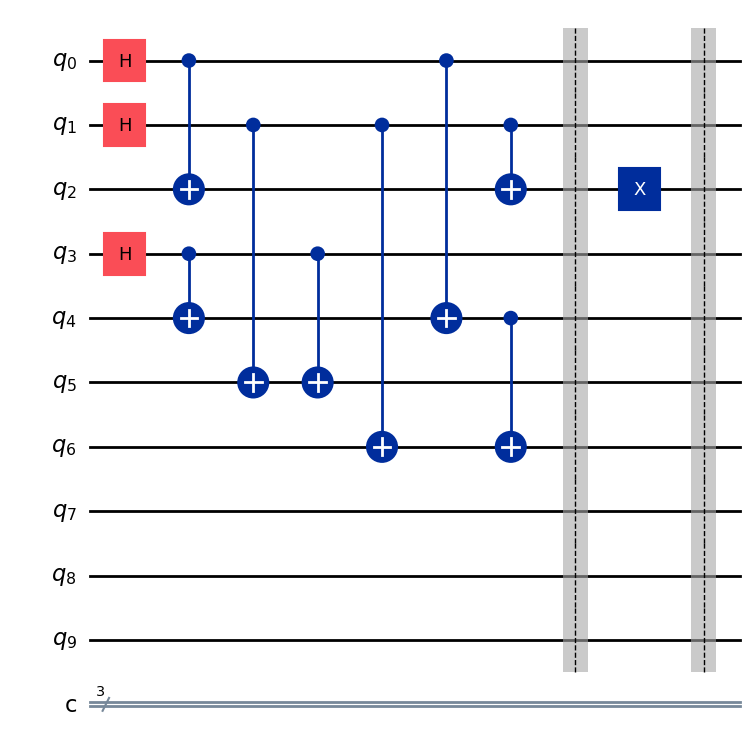

In [2]:
#Error occurs
encodingcircuit.x(qreg[2])
encodingcircuit.barrier()
encodingcircuit.draw('mpl', style='iqp')

In [3]:
#Decoding Phase

#Stabilizer Z0 Z2 Z6 Z4
encodingcircuit.cx(qreg[0], qreg[7])
encodingcircuit.cx(qreg[2], qreg[7])
encodingcircuit.cx(qreg[6], qreg[7])
encodingcircuit.cx(qreg[4], qreg[7])
encodingcircuit.barrier()

#Stabilizer Z2 Z6 Z1 Z5
encodingcircuit.cx(qreg[2], qreg[8])
encodingcircuit.cx(qreg[6], qreg[8])
encodingcircuit.cx(qreg[1], qreg[8])
encodingcircuit.cx(qreg[5], qreg[8])
encodingcircuit.barrier()

#Stabilizer Z6 Z4 Z5 Z3
encodingcircuit.cx(qreg[6], qreg[9])
encodingcircuit.cx(qreg[4], qreg[9])
encodingcircuit.cx(qreg[5], qreg[9])
encodingcircuit.cx(qreg[3], qreg[9])
encodingcircuit.barrier()

#Measurement
encodingcircuit.measure(qreg[7], creg[0])
encodingcircuit.measure(qreg[8], creg[1])
encodingcircuit.measure(qreg[9], creg[2])
encodingcircuit.barrier()

#Applies recovery gates based on the syndrome measurement
with encodingcircuit.if_test((creg, 1)) as else_:
    encodingcircuit.x(qreg[0])
with encodingcircuit.if_test((creg, 10)) as else_:
    encodingcircuit.x(qreg[1])
with encodingcircuit.if_test((creg, 11)) as else_:
    encodingcircuit.x(qreg[2])
with encodingcircuit.if_test((creg, 100)) as else_:
    encodingcircuit.x(qreg[3])
with encodingcircuit.if_test((creg, 101)) as else_:
    encodingcircuit.x(qreg[4])
with encodingcircuit.if_test((creg, 110)) as else_:
    encodingcircuit.x(qreg[5])
with encodingcircuit.if_test((creg, 111)) as else_:
    encodingcircuit.x(qreg[6])

011


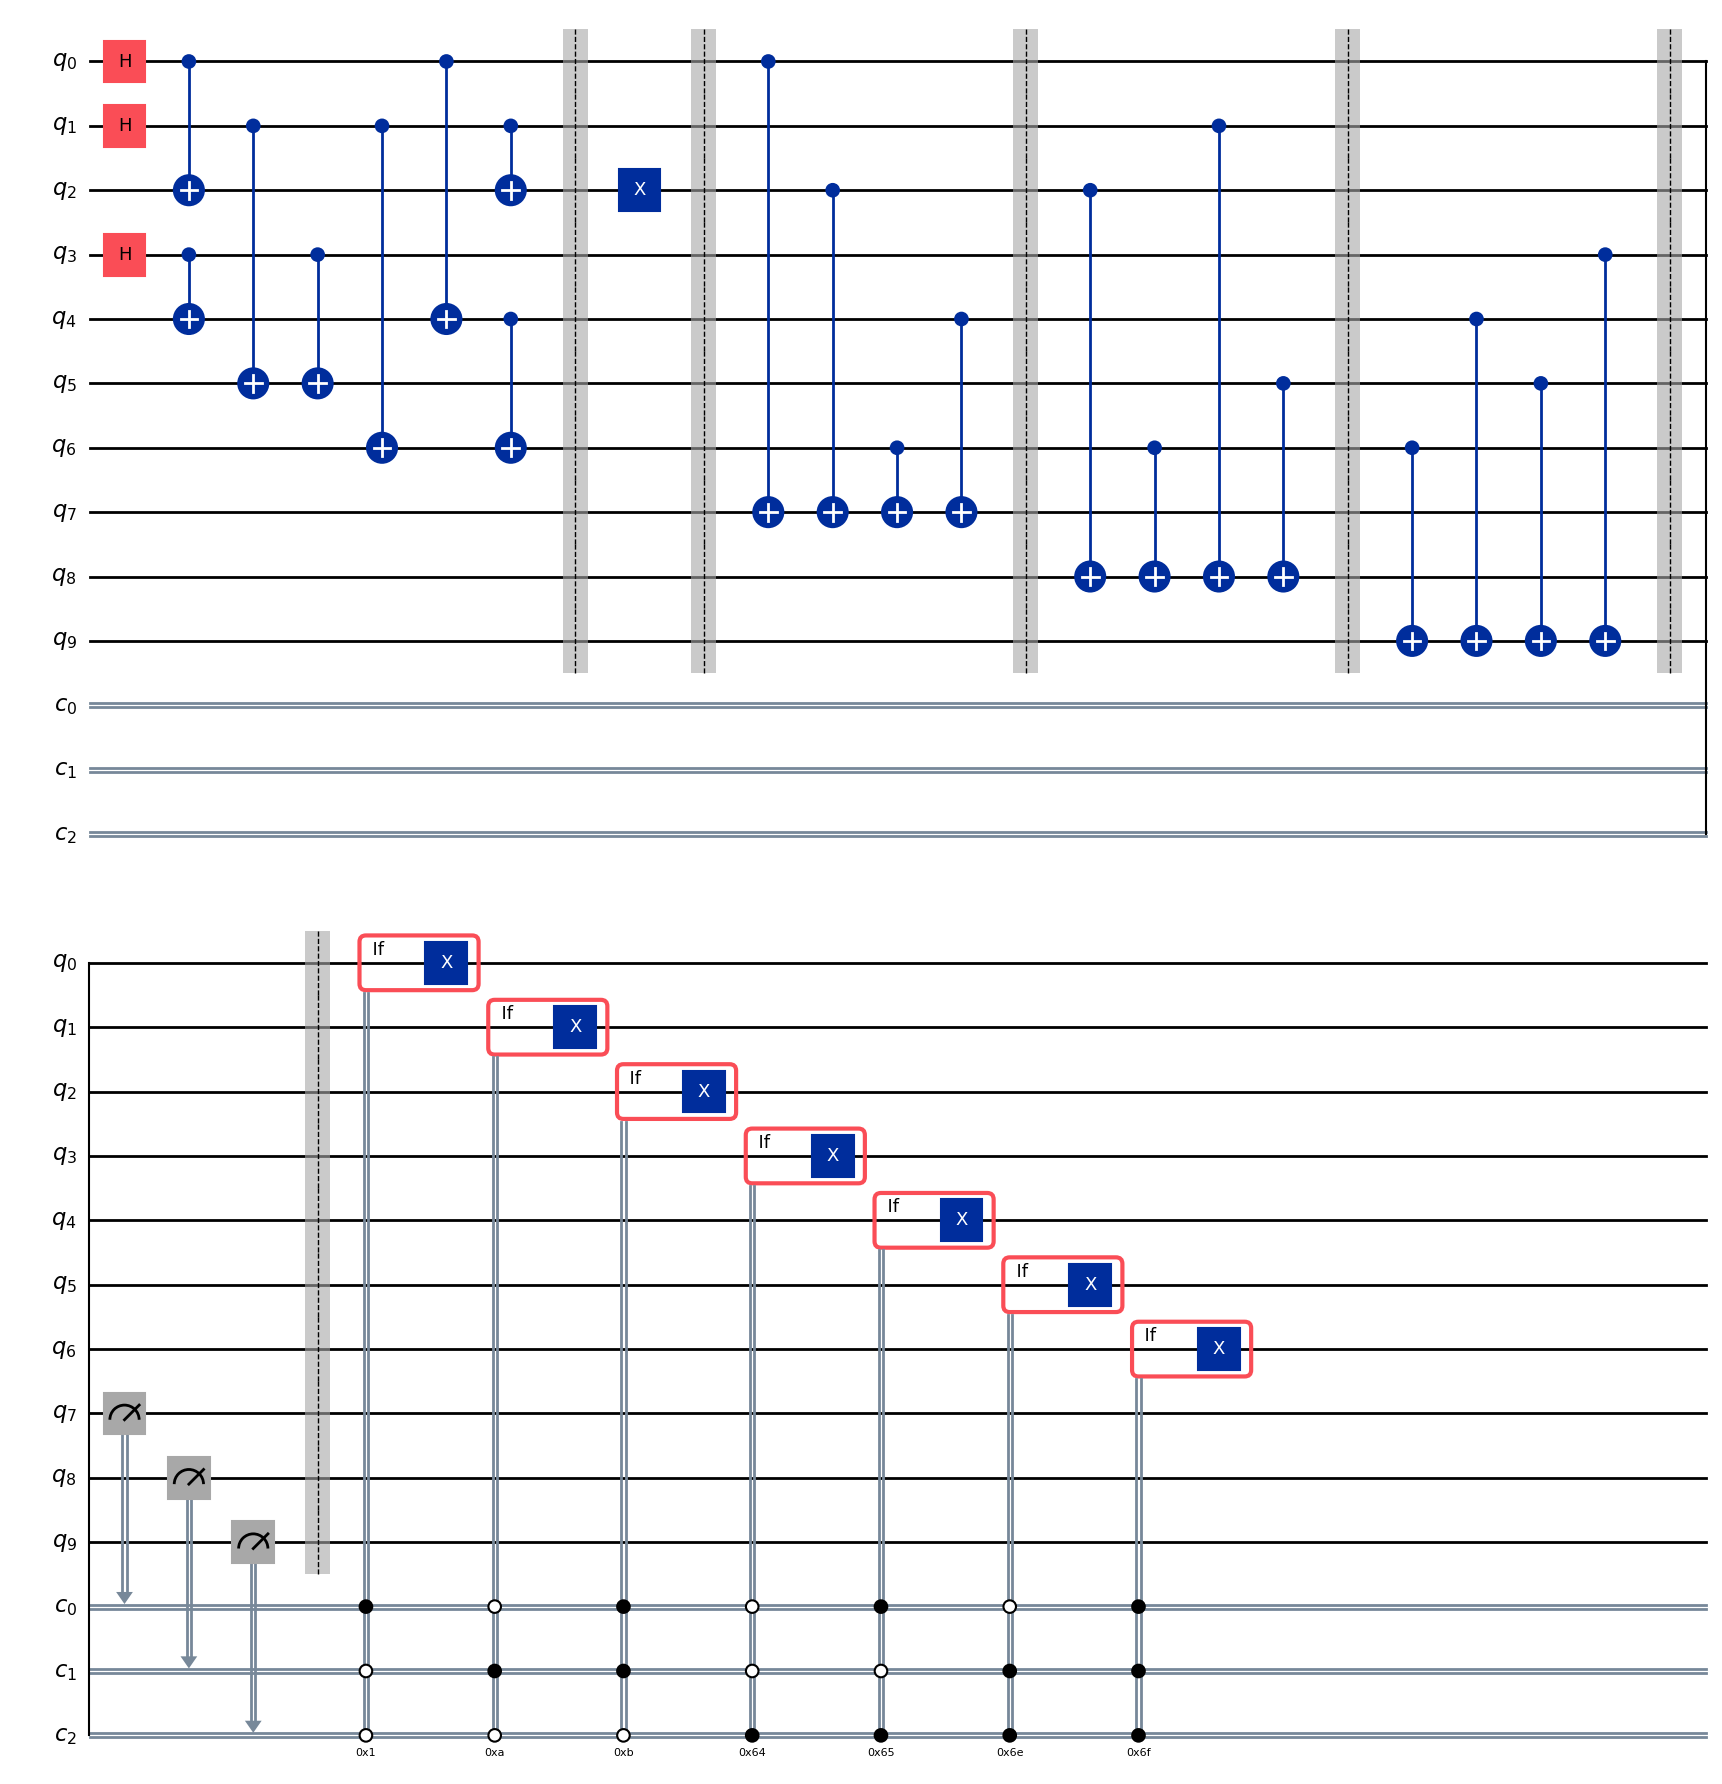

In [4]:
from qiskit.providers.basic_provider import BasicSimulator
from qiskit_aer import AerSimulator
from qiskit import transpile

#Runs the circuit on the simulator and prints out the syndrome measurement
simulator = AerSimulator()
qc = transpile(encodingcircuit, backend=simulator)
result = simulator.run(qc, shots=1, memory=True).result()
x_syndrome = result.get_memory(encodingcircuit)[0]
print(x_syndrome)

#Draws final circuit with recovery gates
encodingcircuit.draw('mpl', style='iqp', cregbundle=False)